In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,auc,roc_auc_score,roc_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures


In [2]:
fraud_tx_data = pd.read_csv('fraud_txn.csv')
print(fraud_tx_data.info()) # no missng values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15506 entries, 0 to 15505
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15506 non-null  int64  
 1   trans_date_trans_time  15506 non-null  object 
 2   cc_num                 15506 non-null  int64  
 3   merchant               15506 non-null  object 
 4   category               15506 non-null  object 
 5   amt                    15506 non-null  float64
 6   first                  15506 non-null  object 
 7   last                   15506 non-null  object 
 8   gender                 15506 non-null  object 
 9   street                 15506 non-null  object 
 10  city                   15506 non-null  object 
 11  state                  15506 non-null  object 
 12  zip                    15506 non-null  int64  
 13  lat                    15506 non-null  float64
 14  long                   15506 non-null  float64
 15  ci

In [3]:
fraud_tx_data.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-12-16 12:40:56,377113842678100,"fraud_O'Connell, Botsford and Hand",home,32.65,Billy,Gallagher,M,673 Delgado Burg,...,39.4055,-75.3209,804,Insurance risk surveyor,1965-03-25,ecf3cff893d47eeec287958f2dcbe9f8,1355661656,38.988831,-75.442420,0
1,1,2019-11-10 21:29:24,502038091380,"fraud_Haley, Jewess and Bechtelar",shopping_pos,819.52,Kurt,Peters,M,7290 Ashlee Keys,...,36.6704,-93.0377,1201,"Engineer, agricultural",1980-03-18,46f3f81e3f27d015db2d80f16a663b3d,1352582964,37.502359,-92.941619,1
2,2,2019-12-31 22:11:08,30181367542315,"fraud_Tillman, Fritsch and Schmitt",misc_net,808.97,Danielle,Walker,F,9824 Mitchell Run,...,44.2415,-121.0113,2016,Local government officer,1953-12-25,cf6151929f0b38c9db2181b27423cd34,1356991868,44.931750,-121.287451,1
3,3,2020-04-09 17:23:25,376445266762684,"fraud_Mueller, Gerhold and Mueller",health_fitness,64.85,Rachel,Lowe,F,372 Jeffrey Course,...,41.1558,-101.1360,1789,Insurance broker,1982-02-11,5124d4971ec41f68634646067f63cd16,1365528205,41.084349,-100.922198,0
4,4,2019-12-22 15:03:23,3500969075198072,fraud_Frami Group,entertainment,63.20,Kenneth,Sanchez,M,0110 Ashley Forest,...,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,c8b812894d9b9ca7feeff9c83facaec1,1356188603,46.411414,-116.657814,0
5,5,2020-02-21 04:57:23,676372984911,"fraud_Kovacek, Dibbert and Ondricka",grocery_pos,110.59,Vicki,Mendoza,F,3645 Atkins Island Apt. 238,...,39.7562,-98.4462,242,Tourism officer,1987-07-18,3b1b8781a36eaa6ae7df3b0840369355,1361422643,40.250126,-98.304429,0
6,6,2019-12-15 10:18:21,4319584480204988982,fraud_Flatley-Durgan,misc_net,3.83,Kathleen,Nash,F,010 Salazar Walk,...,37.1788,-82.6950,502,Chief Financial Officer,1960-02-01,6f72bf866795d59f6d9945d40e1d3b36,1355566701,37.794048,-82.557027,0
7,7,2019-08-12 02:52:18,4294040533480516,fraud_Nader-Heller,misc_net,666.73,Gail,Weaver,F,979 Stewart Lake,...,33.4130,-81.6900,2206,Biomedical scientist,1986-12-31,fa8c59a7e7b6748f8ce4f9378c5b7072,1344739938,33.170856,-80.819823,1
8,8,2019-06-07 22:05:01,2703186189652095,fraud_Breitenberg LLC,travel,9.91,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,3361622d818c4d6b68556e18ed3fc3ad,1339106701,36.423018,-81.393957,0
9,9,2020-06-01 12:01:45,30230540139182,fraud_Eichmann-Kilback,home,60.62,Hayden,Sanders,M,8465 Reed Green Suite 559,...,40.9661,-76.8575,645,Orthoptist,1974-05-18,e0b34bcb2d1f90c9aa20c8680512af16,1370088105,40.578915,-76.295059,0


In [4]:
####  Data Cleaning and Preprocessing #######
# Remove columns that does not probably contribute to the outcome column - "is_fraud"  like address / customer demographic / jobs / transaction number 
# transaction date time.
fraud_tx_data.drop(columns=['Unnamed: 0','trans_date_trans_time','cc_num', 'first', 'last', 'street', 'city', 'state', 'job', 'dob', 'trans_num'], inplace=True)

In [5]:
fraud_tx_data.info() # 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15506 entries, 0 to 15505
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    15506 non-null  object 
 1   category    15506 non-null  object 
 2   amt         15506 non-null  float64
 3   gender      15506 non-null  object 
 4   zip         15506 non-null  int64  
 5   lat         15506 non-null  float64
 6   long        15506 non-null  float64
 7   city_pop    15506 non-null  int64  
 8   unix_time   15506 non-null  int64  
 9   merch_lat   15506 non-null  float64
 10  merch_long  15506 non-null  float64
 11  is_fraud    15506 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 1.4+ MB


In [6]:
fraud_tx_data.head()

,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_O'Connell, Botsford and Hand",home,32.65,M,8323,39.4055,-75.3209,804,1355661656,38.988831,-75.442420,0
1,"fraud_Haley, Jewess and Bechtelar",shopping_pos,819.52,M,65680,36.6704,-93.0377,1201,1352582964,37.502359,-92.941619,1
2,"fraud_Tillman, Fritsch and Schmitt",misc_net,808.97,F,97753,44.2415,-121.0113,2016,1356991868,44.931750,-121.287451,1
3,"fraud_Mueller, Gerhold and Mueller",health_fitness,64.85,F,69165,41.1558,-101.1360,1789,1365528205,41.084349,-100.922198,0
4,fraud_Frami Group,entertainment,63.20,M,99033,47.2271,-117.0819,895,1356188603,46.411414,-116.657814,0


In [7]:
# Find all Categorical-like (object or category dtype)
categorical_ftre_cols = fraud_tx_data.select_dtypes(include=['object','category']).columns.tolist()
print("categorical feature columns : ",categorical_ftre_cols)
# Find all Numerical -like columns
numerical_cols = fraud_tx_data.select_dtypes(exclude=['object','category']).columns.tolist()
print("numeric columns : ",numerical_cols)

target_column_label = 'is_fraud' # this is y outcome label.
target_column_label_index = numerical_cols.index(target_column_label)
print("target_column_label_index : ", target_column_label_index)

# get elements before target col index + get elements after target col index 
numerical_ftre_cols = numerical_cols[:target_column_label_index] + numerical_cols[target_column_label_index + 1:]

print("numeric feature columns : ", numerical_ftre_cols)

categorical feature columns :  ['merchant', 'category', 'gender']
numeric columns :  ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
target_column_label_index :  8
numeric feature columns :  ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']


In [8]:
#feature Engineering
categ_col_one_hot_encoder = OneHotEncoder(drop='first') # Encode categorical features as a one-hot numeric array.
numeric_col_std_unit_var_scaler = StandardScaler() # Standardize features by removing the mean and scaling to unit variance.

# Applies transformers to columns of an array or pandas DataFrame.
feature_columns_transformer = ColumnTransformer([
    ('num', numeric_col_std_unit_var_scaler, numerical_ftre_cols),
    ('cat', categ_col_one_hot_encoder, categorical_ftre_cols)
])
print("preprocessor : ", feature_columns_transformer)

preprocessor :  ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['amt', 'zip', 'lat', 'long', 'city_pop',
                                  'unix_time', 'merch_lat', 'merch_long']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['merchant', 'category', 'gender'])])


In [9]:
# Unix time (also called Epoch time or POSIX time) is a system for describing points in time as the number of seconds that have elapsed since 
# the Unix epoch gravitationally defined as 00:00:00 UTC on January 1, 1970, not counting leap seconds.

# Add a transaction hour column calculated from unix_time column having unix time stamps.
# The transaction hour of the day i.e. from 0 to 23 hours

fraud_tx_data['transaction_hour'] = pd.to_datetime(fraud_tx_data['unix_time'], unit='s').dt.hour

# The .dt accessor is used to access datetime-like properties and methods on a Series of dtype datetime64[ns]
# This extracts the hour component (0 through 23) from each Timestamp in the Series. 
# It gives you a new Series of integers representing the hour part of the corresponding timestamp.

fraud_tx_data.head() # check for transaction_hour feature added


,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,transaction_hour
0,"fraud_O'Connell, Botsford and Hand",home,32.65,M,8323,39.4055,-75.3209,804,1355661656,38.988831,-75.442420,0,12
1,"fraud_Haley, Jewess and Bechtelar",shopping_pos,819.52,M,65680,36.6704,-93.0377,1201,1352582964,37.502359,-92.941619,1,21
2,"fraud_Tillman, Fritsch and Schmitt",misc_net,808.97,F,97753,44.2415,-121.0113,2016,1356991868,44.931750,-121.287451,1,22
3,"fraud_Mueller, Gerhold and Mueller",health_fitness,64.85,F,69165,41.1558,-101.1360,1789,1365528205,41.084349,-100.922198,0,17
4,fraud_Frami Group,entertainment,63.20,M,99033,47.2271,-117.0819,895,1356188603,46.411414,-116.657814,0,15


In [10]:
# Define target and features
X_features = fraud_tx_data.drop(columns=[target_column_label])
y_fraud_label = fraud_tx_data['is_fraud']

In [11]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15506 entries, 0 to 15505
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   merchant          15506 non-null  object 
 1   category          15506 non-null  object 
 2   amt               15506 non-null  float64
 3   gender            15506 non-null  object 
 4   zip               15506 non-null  int64  
 5   lat               15506 non-null  float64
 6   long              15506 non-null  float64
 7   city_pop          15506 non-null  int64  
 8   unix_time         15506 non-null  int64  
 9   merch_lat         15506 non-null  float64
 10  merch_long        15506 non-null  float64
 11  transaction_hour  15506 non-null  int32  
dtypes: float64(5), int32(1), int64(3), object(3)
memory usage: 1.4+ MB


In [12]:
y_fraud_label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15506 entries, 0 to 15505
Series name: is_fraud
Non-Null Count  Dtype
--------------  -----
15506 non-null  int64
dtypes: int64(1)
memory usage: 121.3 KB


In [13]:
X_features.head()

,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,transaction_hour
0,"fraud_O'Connell, Botsford and Hand",home,32.65,M,8323,39.4055,-75.3209,804,1355661656,38.988831,-75.442420,12
1,"fraud_Haley, Jewess and Bechtelar",shopping_pos,819.52,M,65680,36.6704,-93.0377,1201,1352582964,37.502359,-92.941619,21
2,"fraud_Tillman, Fritsch and Schmitt",misc_net,808.97,F,97753,44.2415,-121.0113,2016,1356991868,44.931750,-121.287451,22
3,"fraud_Mueller, Gerhold and Mueller",health_fitness,64.85,F,69165,41.1558,-101.1360,1789,1365528205,41.084349,-100.922198,17
4,fraud_Frami Group,entertainment,63.20,M,99033,47.2271,-117.0819,895,1356188603,46.411414,-116.657814,15


In [14]:
y_fraud_label.head()

0    0
1    1
2    1
3    0
4    0
Name: is_fraud, dtype: int64

In [15]:
# Train-test split 80-20 percentage
X_train, X_test, y_train, y_test = train_test_split(X_features, y_fraud_label, test_size=0.2, random_state=42)
print("X_features.shape : ", X_features.shape)
print("y_fraud_label.shape : ", y_fraud_label.shape)
print("X_train.shape : ", X_train.shape)
print("y_train.shape : ",y_train.shape)
print("X_test.shape : ",X_test.shape)
print("y_test.shape : ",y_test.shape)

X_features.shape :  (15506, 12)
y_fraud_label.shape :  (15506,)
X_train.shape :  (12404, 12)
y_train.shape :  (12404,)
X_test.shape :  (3102, 12)
y_test.shape :  (3102,)


In [16]:
X_train.head()

,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,transaction_hour
10104,"fraud_Turcotte, McKenzie and Koss",entertainment,589.27,F,38740,34.0470,-90.7652,466,1338071078,34.527371,-89.953416,22
13552,"fraud_Christiansen, Goyette and Schamberger",gas_transport,72.75,M,5654,44.1554,-72.4847,970,1346152726,43.168748,-72.740002,11
5228,fraud_Mohr Inc,shopping_pos,935.40,M,37302,35.0149,-85.0164,3730,1358461269,35.729938,-85.754176,22
5556,fraud_Roob LLC,grocery_net,13.04,F,97375,44.9897,-122.6187,1252,1342228352,44.121879,-122.335006,1
12163,fraud_Kihn Inc,shopping_pos,1240.72,M,54154,44.8755,-88.1555,5548,1340036728,44.069361,-87.469170,16


In [17]:
y_train.head()

10104    1
13552    0
5228     1
5556     1
12163    0
Name: is_fraud, dtype: int64

In [18]:
# Apply numerical / categorical related one-hot encoding and scalar transformation.
# train and fit.Fit all transformers, transform the data and concatenate results.
X_Train_Feature_transform = feature_columns_transformer.fit_transform(X_train) 

#Transform X separately by each transformer, concatenate results. Transform test features using the pattern learned from fit_transform()
X_Test_Feature_transform = feature_columns_transformer.transform(X_test)

In [19]:
# Encoded and Normalized / Standardized 
print(" Data type of X_Train_Feature_transform : ",type(X_Train_Feature_transform)," shape : ", X_Train_Feature_transform.shape,
      " Data Size :",X_Train_Feature_transform.size)
print(" Data type of X_Test_Feature_transform : ",type(X_Test_Feature_transform) , "shape :",  X_Test_Feature_transform.shape
      , " Data Size :",X_Test_Feature_transform.size)
# 714 columns via one-hot encoding and normalization.
 

 Data type of X_Train_Feature_transform :  <class 'scipy.sparse._csr.csr_matrix'>  shape :  (12404, 714)  Data Size : 129299
 Data type of X_Test_Feature_transform :  <class 'scipy.sparse._csr.csr_matrix'> shape : (3102, 714)  Data Size : 32387


In [20]:
# As there are 714 columns like 714 feature columns, need to take the top 10 principal component compressed features
#  that are most significant for outcome prediction. Take PCA for original transformed features.
pca_for_original_transformed_features = PCA(n_components=10)
X_train_pca_deg1 = pca_for_original_transformed_features.fit_transform(X_Train_Feature_transform) # Train and fit.
X_test_pca_deg1 = pca_for_original_transformed_features.transform(X_Test_Feature_transform) # transform using trained pattern as per prior step.

print(" Data type of X_train_pca_deg1 : ",type(X_train_pca_deg1)," shape : ", X_train_pca_deg1.shape,
      " Data Size :",X_train_pca_deg1.size)

print(" Data type of X_test_pca_deg1 : ",type(X_test_pca_deg1)," shape : ", X_test_pca_deg1.shape,
      " Data Size :",X_test_pca_deg1.size)

 Data type of X_train_pca_deg1 :  <class 'numpy.ndarray'>  shape :  (12404, 10)  Data Size : 124040
 Data type of X_test_pca_deg1 :  <class 'numpy.ndarray'>  shape :  (3102, 10)  Data Size : 31020


--- For Degree 1 or Original PCA transformed features ---
--- Model Logistic Regression ---
############## Classification Report: Train Data Prediction ###################
Accuracy: 0.8417445985166075
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      6398
           1       0.91      0.75      0.82      6006

    accuracy                           0.84     12404
   macro avg       0.85      0.84      0.84     12404
weighted avg       0.85      0.84      0.84     12404

Confusion Matrix:
 [[5950  448]
 [1515 4491]]
############## Classification Report: Test Data Prediction ###################
Accuracy: 0.8365570599613152
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85      1602
           1       0.90      0.74      0.81      1500

    accuracy                           0.84      3102
   macro avg       0.85      0.83      0.83      310

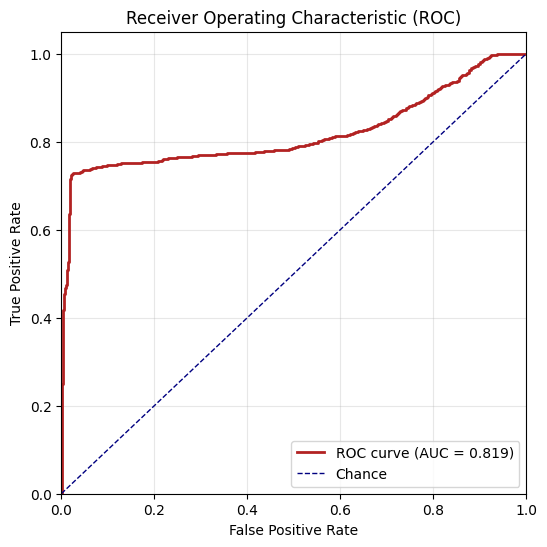

--- Model K-Nearest Neighbors ---
############## Classification Report: Train Data Prediction ###################
Accuracy: 0.9115607868429539
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      6398
           1       0.91      0.91      0.91      6006

    accuracy                           0.91     12404
   macro avg       0.91      0.91      0.91     12404
weighted avg       0.91      0.91      0.91     12404

Confusion Matrix:
 [[5856  542]
 [ 555 5451]]
############## Classification Report: Test Data Prediction ###################
Accuracy: 0.8733075435203095
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      1602
           1       0.88      0.85      0.87      1500

    accuracy                           0.87      3102
   macro avg       0.87      0.87      0.87      3102
weighted avg       0.87      0.87      0.87      3102

C

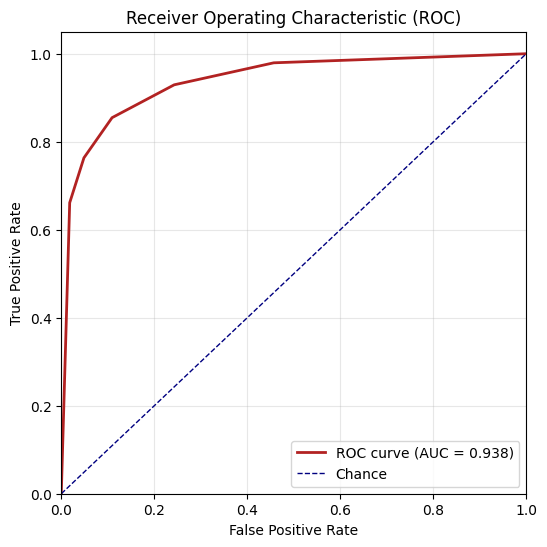

--- Model Decision Tree ---
############## Classification Report: Train Data Prediction ###################
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6398
           1       1.00      1.00      1.00      6006

    accuracy                           1.00     12404
   macro avg       1.00      1.00      1.00     12404
weighted avg       1.00      1.00      1.00     12404

Confusion Matrix:
 [[6398    0]
 [   0 6006]]
############## Classification Report: Test Data Prediction ###################
Accuracy: 0.8894261766602192
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1602
           1       0.88      0.90      0.89      1500

    accuracy                           0.89      3102
   macro avg       0.89      0.89      0.89      3102
weighted avg       0.89      0.89      0.89      3102

Confusion Matrix:
 [[1

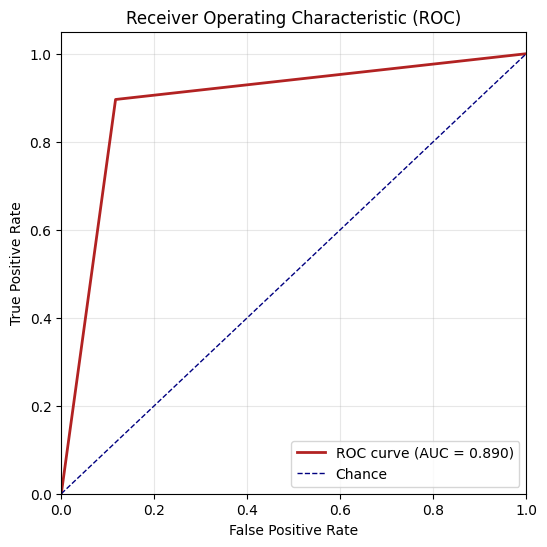

In [21]:
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}
print(f'--- For Degree 1 or Original PCA transformed features ---')
for model_name, model in classification_models.items():

    # Train each model with X_train PCA features and Tarining Labels
    model.fit(X_train_pca_deg1, y_train) 

    # Predict using X_test_pca_deg1 pca 
    y_pred_test = model.predict(X_test_pca_deg1)

    # Predict using X_train_pca_deg1 pca 
    y_pred_train = model.predict(X_train_pca_deg1)

    print(f'--- Model {model_name} ---')
    print("############## Classification Report: Train Data Prediction ###################")
    print('Accuracy:', accuracy_score(y_train, y_pred_train))
    print('Classification Report:\n', classification_report(y_train, y_pred_train))
    print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_train))
    print("############## Classification Report: Test Data Prediction ###################")
    print('Accuracy:', accuracy_score(y_test, y_pred_test))
    print('Classification Report:\n', classification_report(y_test, y_pred_test))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))
    print('\n')

    print(f"############## ROC and AUC Curve for Test Data for Model {model_name}  ###################")
    #Get predicted scores (probabilities for the positive class i.e. fraudulent transactions)
    y_test_predict_val_proba = model.predict_proba(X_test_pca_deg1)[:,1]
    ## Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_val_proba)
    auc = roc_auc_score(y_test, y_test_predict_val_proba)
    
    print(f"########## ROC and AUC Metrics ##############")
    print(f"fpr.size : {fpr.size}, tpr.size : {tpr.size}, thresholds.size : {thresholds.size} ")
    print(f"auc : {auc}")
    
    # Plot ROC
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='firebrick', lw=2, label=f'ROC curve (AUC = {auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()


For degree 1 or original transformed features , the KNN Model performs best with AUC = 0.938

This line creates an instance of PolynomialFeatures from scikit-learn, which will be used to generate polynomial and interaction features from input data.

Breakdown of the arguments:

PolynomialFeatures(...)

A transformer that expands your feature set by adding polynomial terms.
degree=2

The highest degree of the polynomial features to generate.
This will produce all monomials of degree 2 or less (since include_bias=False, only degree-1 and degree-2 terms are included). Concretely, for n input features, you get:
All original features (degree 1)
All pairwise interaction terms and squared terms (degree 2)
interaction_only=False

If True, only interaction terms are produced (no squared terms). For example, with features x1, x2:
interaction_only=True would generate x1*x2 but not x1^2 or x2^2.
Since False, both squared terms (x1^2, x2^2) and cross-terms (x1*x2) are generated.
include_bias=False

If True, a bias (constant) term of 1 is added as the first feature.
False means no constant term is added. This is common when you’re going to fit a model that already includes an intercept or when you’ll manually add a bias elsewhere.
Putting it together:

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
This creates a transformer that, when fitted to data X and then transformed, will output all original features plus all squared terms and cross-terms up to degree 2, without a leading 1 column.
Example usage:

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_transformed = poly.fit_transform(X)

In [22]:
# To output all original features plus all squared terms and cross-terms up to degree 2, without a leading 1 column.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly_deg2 = poly.fit_transform(X_Train_Feature_transform)
X_test_poly_deg2 = poly.transform(X_Test_Feature_transform)

# As there are 714 columns like 714 feature columns, need to take the top 10 principal component compressed features
#  that are most significant for outcome prediction. Take PCA for degree 2  transformed features.
pca_for_deg2_transformed_features = PCA(n_components=10)

X_train_pca_deg2 = pca_for_deg2_transformed_features.fit_transform(X_train_poly_deg2) # Train and fit.
X_test_pca_deg2 = pca_for_deg2_transformed_features.transform(X_test_poly_deg2) # transform using trained pattern as per prior step.

print(" Data type of X_train_pca_deg2 : ",type(X_train_pca_deg2)," shape : ", X_train_pca_deg2.shape,
      " Data Size :",X_train_pca_deg2.size)

print(" Data type of X_test_pca_deg2 : ",type(X_test_pca_deg2)," shape : ", X_test_pca_deg2.shape,
      " Data Size :",X_test_pca_deg2.size)

 Data type of X_train_pca_deg2 :  <class 'numpy.ndarray'>  shape :  (12404, 10)  Data Size : 124040
 Data type of X_test_pca_deg2 :  <class 'numpy.ndarray'>  shape :  (3102, 10)  Data Size : 31020


--- For Degree 2 PCA transformed features ---
--- Model Logistic Regression ---
############## Classification Report: Train Data Prediction ###################
Accuracy: 0.7429861335053208
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.99      0.80      6398
           1       0.97      0.48      0.65      6006

    accuracy                           0.74     12404
   macro avg       0.82      0.74      0.72     12404
weighted avg       0.82      0.74      0.72     12404

Confusion Matrix:
 [[6312   86]
 [3102 2904]]
############## Classification Report: Test Data Prediction ###################
Accuracy: 0.7359767891682786
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.98      0.79      1602
           1       0.97      0.47      0.63      1500

    accuracy                           0.74      3102
   macro avg       0.82      0.73      0.71      3102
weighted a

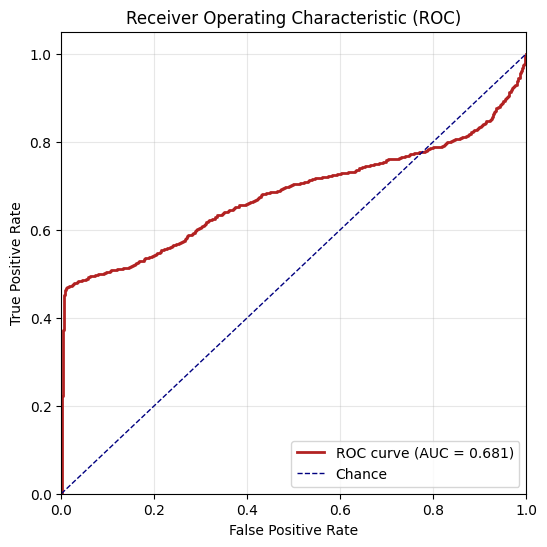

--- Model K-Nearest Neighbors ---
############## Classification Report: Train Data Prediction ###################
Accuracy: 0.9076104482425024
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      6398
           1       0.91      0.90      0.90      6006

    accuracy                           0.91     12404
   macro avg       0.91      0.91      0.91     12404
weighted avg       0.91      0.91      0.91     12404

Confusion Matrix:
 [[5863  535]
 [ 611 5395]]
############## Classification Report: Test Data Prediction ###################
Accuracy: 0.8668600902643456
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1602
           1       0.88      0.83      0.86      1500

    accuracy                           0.87      3102
   macro avg       0.87      0.87      0.87      3102
weighted avg       0.87      0.87      0.87      3102

C

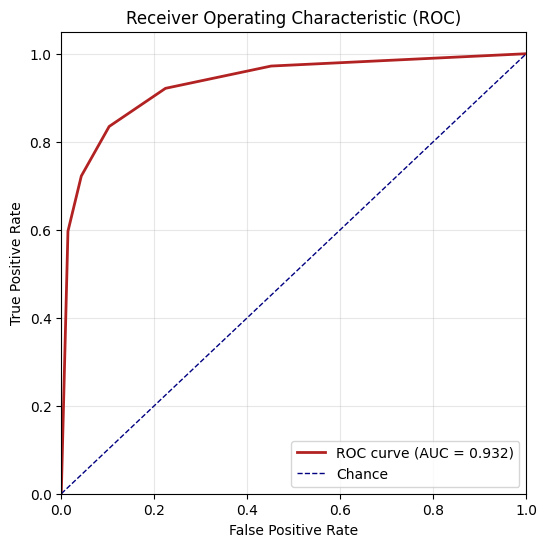

--- Model Decision Tree ---
############## Classification Report: Train Data Prediction ###################
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6398
           1       1.00      1.00      1.00      6006

    accuracy                           1.00     12404
   macro avg       1.00      1.00      1.00     12404
weighted avg       1.00      1.00      1.00     12404

Confusion Matrix:
 [[6398    0]
 [   0 6006]]
############## Classification Report: Test Data Prediction ###################
Accuracy: 0.8230174081237911
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1602
           1       0.81      0.82      0.82      1500

    accuracy                           0.82      3102
   macro avg       0.82      0.82      0.82      3102
weighted avg       0.82      0.82      0.82      3102

Confusion Matrix:
 [[1

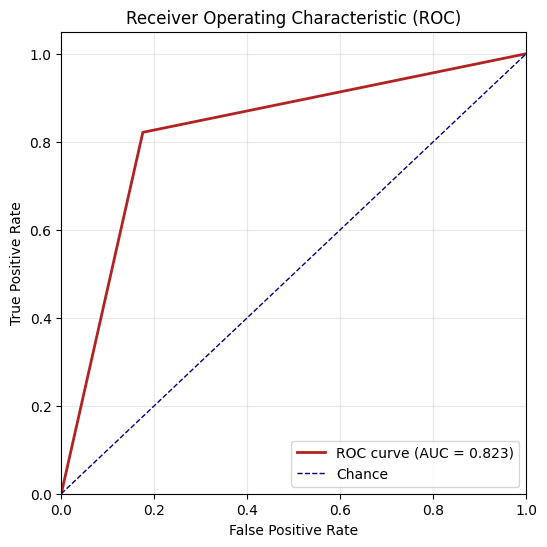

In [23]:
classification_models_deg2 = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}
print(f'--- For Degree 2 PCA transformed features ---')
for model_name, model in classification_models_deg2.items():

    # Train each model with X_train PCA features and Tarining Labels
    model.fit(X_train_pca_deg2, y_train) 

    # Predict using X_test_pca_deg2 pca 
    y_pred_test = model.predict(X_test_pca_deg2)

    # Predict using X_train_pca_deg2 pca 
    y_pred_train = model.predict(X_train_pca_deg2)

    print(f'--- Model {model_name} ---')
    print("############## Classification Report: Train Data Prediction ###################")
    print('Accuracy:', accuracy_score(y_train, y_pred_train))
    print('Classification Report:\n', classification_report(y_train, y_pred_train))
    print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_train))
    print("############## Classification Report: Test Data Prediction ###################")
    print('Accuracy:', accuracy_score(y_test, y_pred_test))
    print('Classification Report:\n', classification_report(y_test, y_pred_test))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))
    print('\n')

    print(f"############## ROC and AUC Curve for Test Data for Model {model_name}  ###################")
    #Get predicted scores (probabilities for the positive class i.e. fraudulent transactions)
    y_test_predict_val_proba = model.predict_proba(X_test_pca_deg2)[:,1]
    ## Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_val_proba)
    auc = roc_auc_score(y_test, y_test_predict_val_proba)
    
    print(f"########## ROC and AUC Metrics ##############")
    print(f"fpr.size : {fpr.size}, tpr.size : {tpr.size}, thresholds.size : {thresholds.size} ")
    print(f"auc : {auc}")
    
    # Plot ROC
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='firebrick', lw=2, label=f'ROC curve (AUC = {auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

For Polynomial degree 2 , the KNN Model performs best with AUC = 0.932